In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("online_retail_data.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [4]:
type(df)

dict

In [5]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [6]:
type(df1)
type(df2)

pandas.core.frame.DataFrame

In [7]:
null_values1 = df1.isnull().sum()
print(null_values1)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [8]:
null_values2 = df2.isnull().sum()
print(null_values2)

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [9]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [10]:
#total rows

sum([df1.shape[0], df2.shape[0]])

1067371

In [11]:
data = pd.concat([df1, df2])

In [12]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [13]:
data.shape

(1067371, 8)

In [14]:
 #to express the null values as a percentage of the total number of rows.
data.isnull().sum()/data.shape[0]*100


Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [15]:
data.dropna(axis = 0, subset = ["Description"], inplace = True)


In [16]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [17]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)


In [18]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
data.head(10)


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [20]:
data.tail(10)

Invoice StockCode                      Description  Quantity  \
541900  581587     22730       ALARM CLOCK BAKELIKE IVORY         4   
541901  581587     22367  CHILDRENS APRON SPACEBOY DESIGN         8   
541902  581587     22629              SPACEBOY LUNCH BOX         12   
541903  581587     23256      CHILDRENS CUTLERY SPACEBOY          4   
541904  581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID Country  
541900 2011-12-09 12:50:00   3.75      12680.0  France  
541901 2011-12-09 12:50:00   1.95      12680.0  France  
541902 2011-12-09 12:50:00   1.95      12680.0  France  
541903 2011-12-09 12:50:00   4.15      12680.0  France  
541904 2011-12-09 12:50:00   0.85      12680.0  France  
541905 2011-12-09 12:50:00   2.10      12680.0  France  
541906 2011-12-09 12:50:00   4.15      12680.0  France  
541907 2011-12-09 12:50:00   4.15      12680.0  France  
541908 2011-12-09 12:50:00   4.95      12680.0  France  
541909 2011-12-09 12:50:00  18.00      12680.0  France

In [21]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [22]:
temp_df

count
Country                     
United Kingdom        741301
Germany                17624
EIRE                   16195
France                 14202
Netherlands             5140
Spain                   3811
Belgium                 3123
Switzerland             3064
Portugal                2504
Australia               1913
Channel Islands         1664
Italy                   1534
Norway                  1455
Sweden                  1345
Cyprus                  1176
Finland                 1049
Austria                  938
Denmark                  817
Greece                   663
Japan                    582
USA                      535
Poland                   535
Unspecified              524
United Arab Emirates     386
Singapore                346
Israel                   324
Malta                    299
Iceland                  253
Canada                   228
Lithuania                189
RSA                      123
Brazil                    94
Thailand                  76
Korea                     63
European Community        61
Bahrain                   59
West Indies               54
Lebanon                   45
Czech Republic            30
Nigeria                   30
Saudi Arabia              10

In [23]:
temp_df.columns
temp_df.reset_index(inplace=True)

In [24]:
temp_df

Country   count
0         United Kingdom  741301
1                Germany   17624
2                   EIRE   16195
3                 France   14202
4            Netherlands    5140
5                  Spain    3811
6                Belgium    3123
7            Switzerland    3064
8               Portugal    2504
9              Australia    1913
10       Channel Islands    1664
11                 Italy    1534
12                Norway    1455
13                Sweden    1345
14                Cyprus    1176
15               Finland    1049
16               Austria     938
17               Denmark     817
18                Greece     663
19                 Japan     582
20                   USA     535
21                Poland     535
22           Unspecified     524
23  United Arab Emirates     386
24             Singapore     346
25                Israel     324
26                 Malta     299
27               Iceland     253
28                Canada     228
29             Lithuania     189
30                   RSA     123
31                Brazil      94
32              Thailand      76
33                 Korea      63
34    European Community      61
35               Bahrain      59
36           West Indies      54
37               Lebanon      45
38        Czech Republic      30
39               Nigeria      30
40          Saudi Arabia      10

In [25]:
px.scatter(temp_df,x="Country" ,y = "count", color = "Country", title = "Count of Countries")


As you can see the United Kingdom has the max transcations as compared to other countries. The one here to note is that the "United Kingdom" is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the United Kingdom from the above chart and see how your axis transforms.

In [26]:
grouped_data = data.groupby("Country")["Quantity"].sum()
sorted_data = grouped_data.sort_values(ascending=False)
top_10_countries = sorted_data.head(10)
print(top_10_countries)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64


In [27]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [28]:
unique_country_count = data["Country"].nunique()
unique_country_count

41

In [29]:
countries = data["Country"].unique()

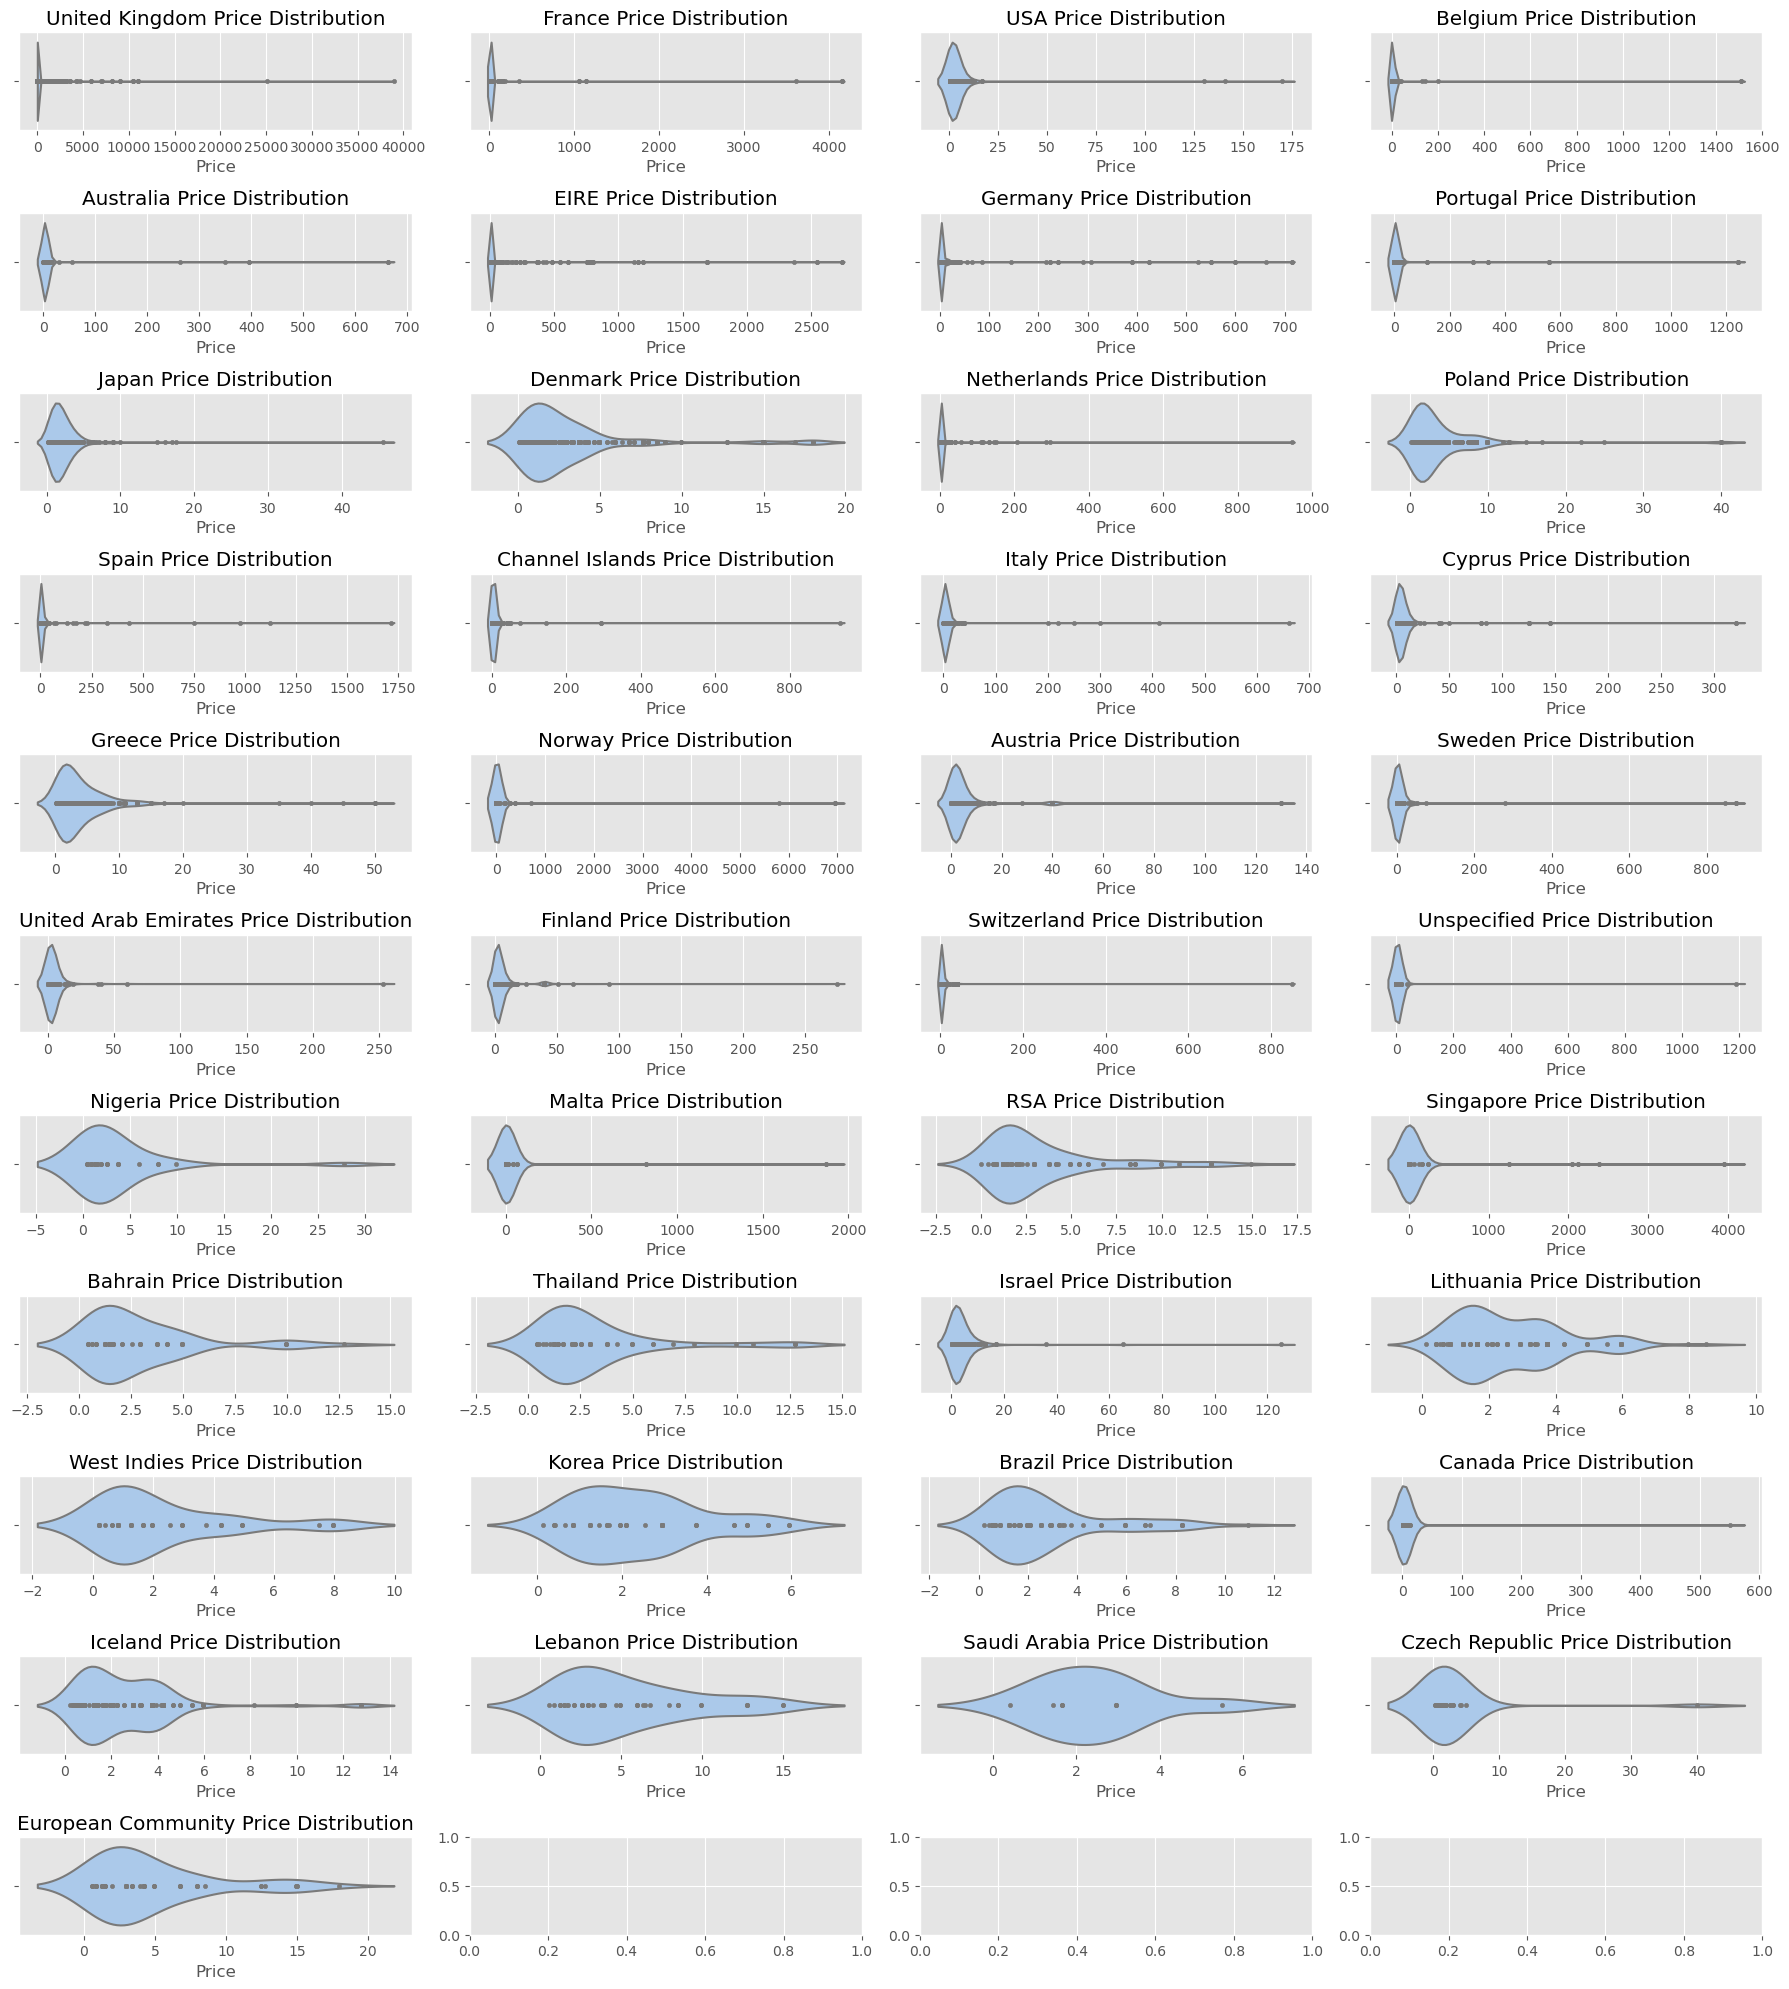

In [30]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()


The plot reveals a heavily skewed distribution with numerous extreme high values, suggesting the presence of significant outliers impacting the dataset's overall distribution and analysis.

In [31]:
#Total Number of Unique Invoices
len(data["Invoice"].unique())

44876

In [32]:
temp_invoice_df = data.groupby("Invoice")["Quantity"].sum()
sorted_data_invoice = temp_invoice_df.sort_values(ascending=False)
top_30_invoice = sorted_data_invoice.head(30)
print(top_30_invoice)

Invoice
518505    87167
524174    87167
497946    83774
581483    80995
541431    74215
501534    63974
495194    63302
502269    40000
493819    25018
491812    20524
509472    17766
490018    17520
530715    15696
556917    15049
563076    14730
572035    13392
521315    13008
526761    12954
495591    12832
567423    12572
578841    12540
508748    12500
552883    12266
563614    12196
536009    12048
518673    11904
562439    11848
548011    11116
545475    10272
535104    10014
Name: Quantity, dtype: int64


In [33]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
grouped_data = data.groupby("Invoice")[numerical_cols].mean()
top_15 = grouped_data.head(15).sort_values("Price", ascending=False)
top_15

Quantity         InvoiceDate       Price  Customer ID
Invoice                                                        
489444    1.000000 2009-12-01 09:55:00  141.000000      12636.0
489447    1.000000 2009-12-01 10:10:00  130.000000      12362.0
489434   20.750000 2009-12-01 07:45:00    4.081250      13085.0
489436   10.157895 2009-12-01 09:06:00    3.730526      13078.0
489437    6.304348 2009-12-01 09:08:00    3.628261      15362.0
489439   11.526316 2009-12-01 09:28:00    3.560000      12682.0
489440    8.000000 2009-12-01 09:43:00    3.150000      18087.0
489446   14.148148 2009-12-01 10:06:00    3.118519      13758.0
489441   25.500000 2009-12-01 09:44:00    3.042500      18087.0
489448   48.000000 2009-12-01 10:18:00    2.970000      15413.0
489435   15.000000 2009-12-01 07:46:00    2.625000      13085.0
489438   48.588235 2009-12-01 09:24:00    2.591176      18102.0
489445   14.736842 2009-12-01 09:57:00    2.477895      17519.0
489443   17.142857 2009-12-01 09:50:00    2.370000      14110.0
489442   11.956522 2009-12-01 09:46:00    2.040870      13635.0

I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 489444 & 489447 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [34]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]


Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

# INITIAL EDA INSIGHTS:


Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

There are total 44876 uniques purchased happend so far.

We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [35]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

# Exploratory Data Analysis Continued.....

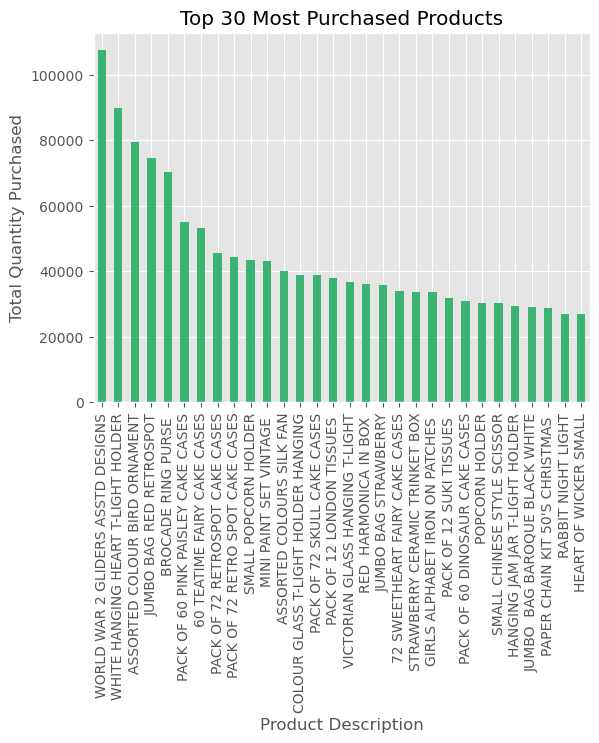

In [36]:
import matplotlib.pyplot as plt

top_30_products = (
    data.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(30)
)

top_30_products.plot(kind="bar", color="mediumseagreen")

plt.title("Top 30 Most Purchased Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Purchased")



# Show the plot
plt.show()


In [37]:
temp_data = data.copy()

In [38]:
temp_data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [39]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [40]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [41]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)


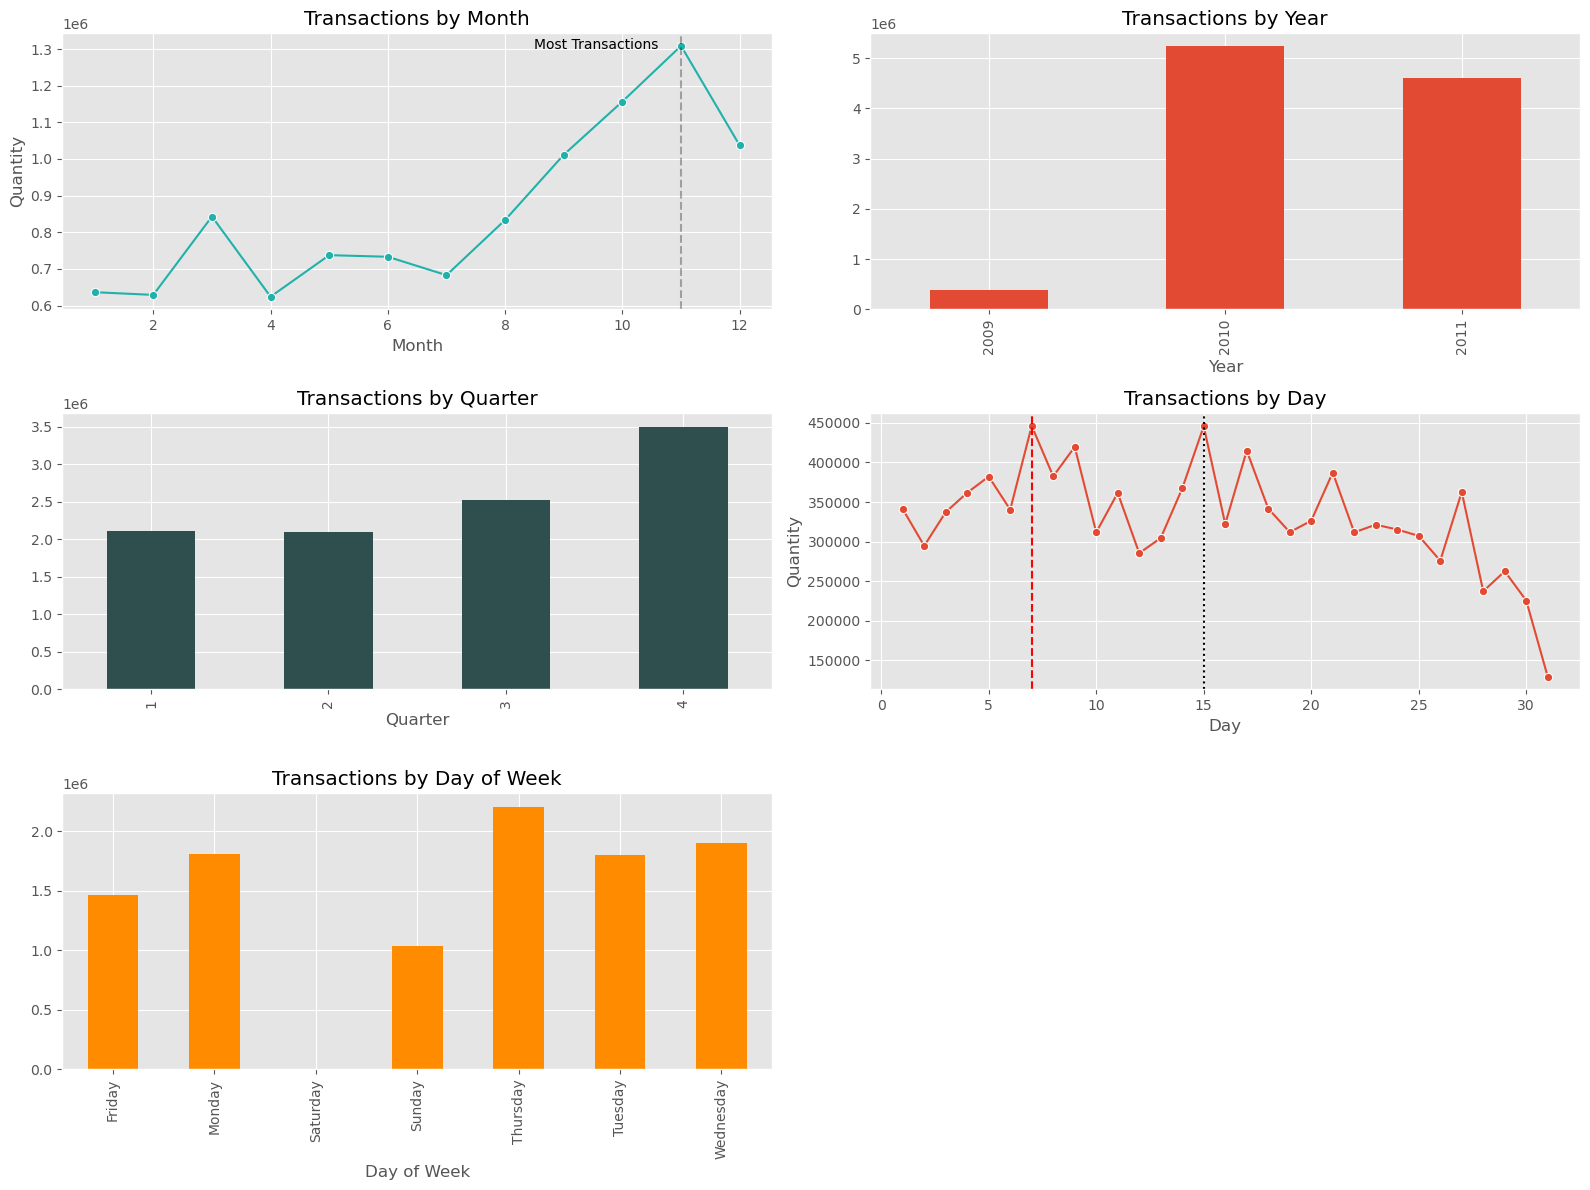

In [42]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data["Year"] = pd.to_numeric(temp_data["Year"], errors="coerce")  # Convert year to numeric (handle errors if needed)
grouped_data = temp_data.groupby("Year")["Quantity"].sum()  # Group and sum by numeric year
grouped_data.plot(kind="bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter")["Quantity"].sum().plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week")["Quantity"].sum().plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()


As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.

In [43]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [44]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [45]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))


These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [46]:
temp = data.groupby(["Country", "Description"])["Quantity"].sum()

In [47]:
temp = pd.DataFrame(temp)

# Top 8 Countries With Most Transactions

In [48]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]


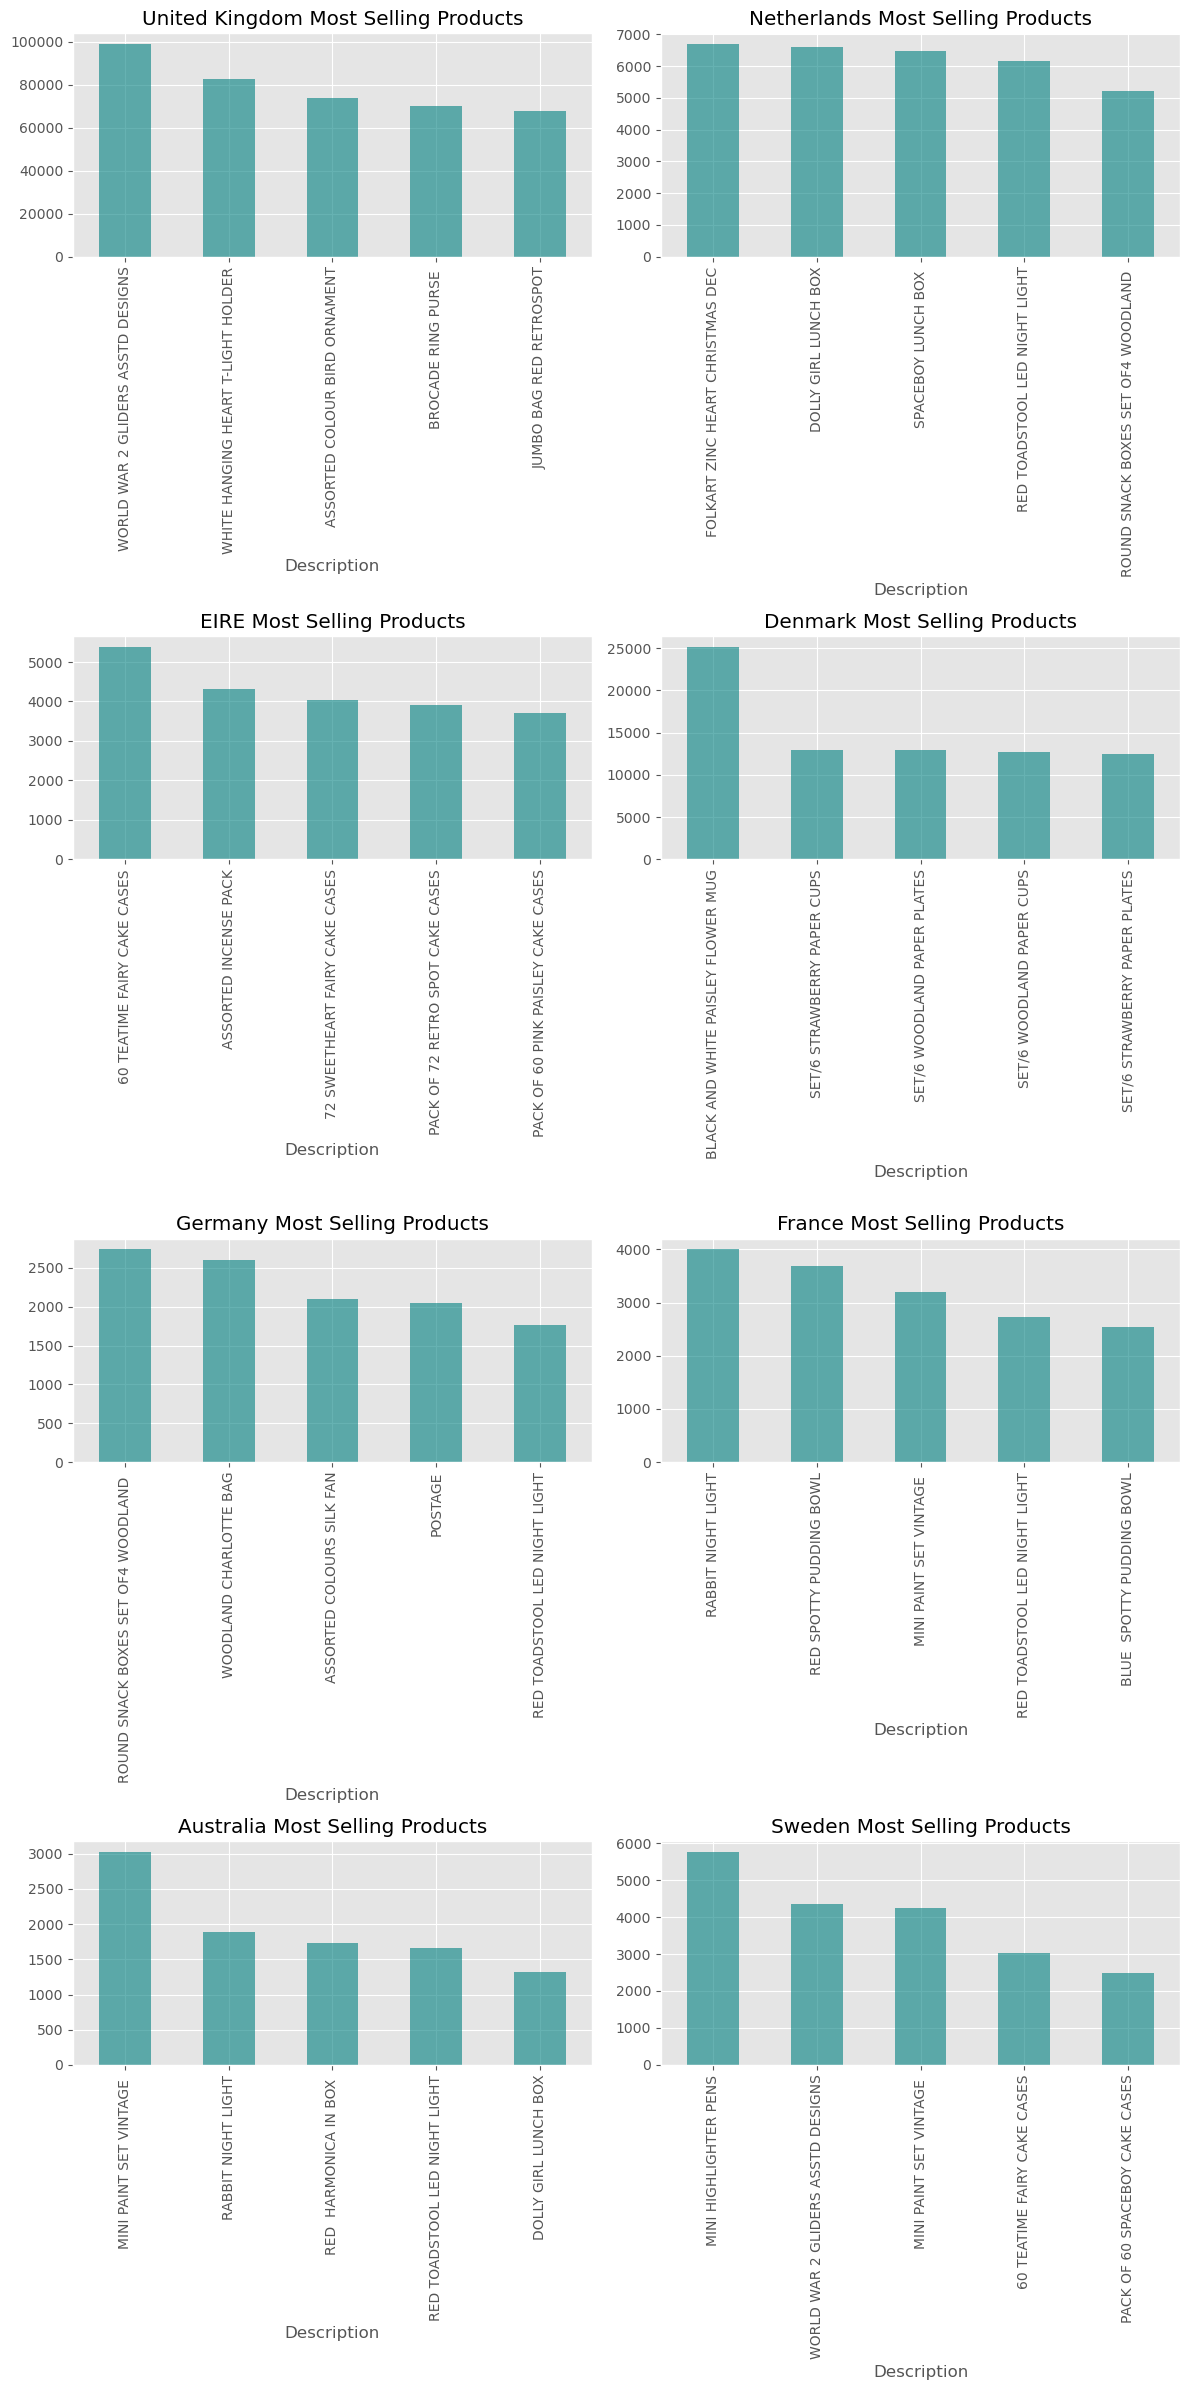

In [49]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()


# Top 8 Countries with Least Transactions

In [50]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]


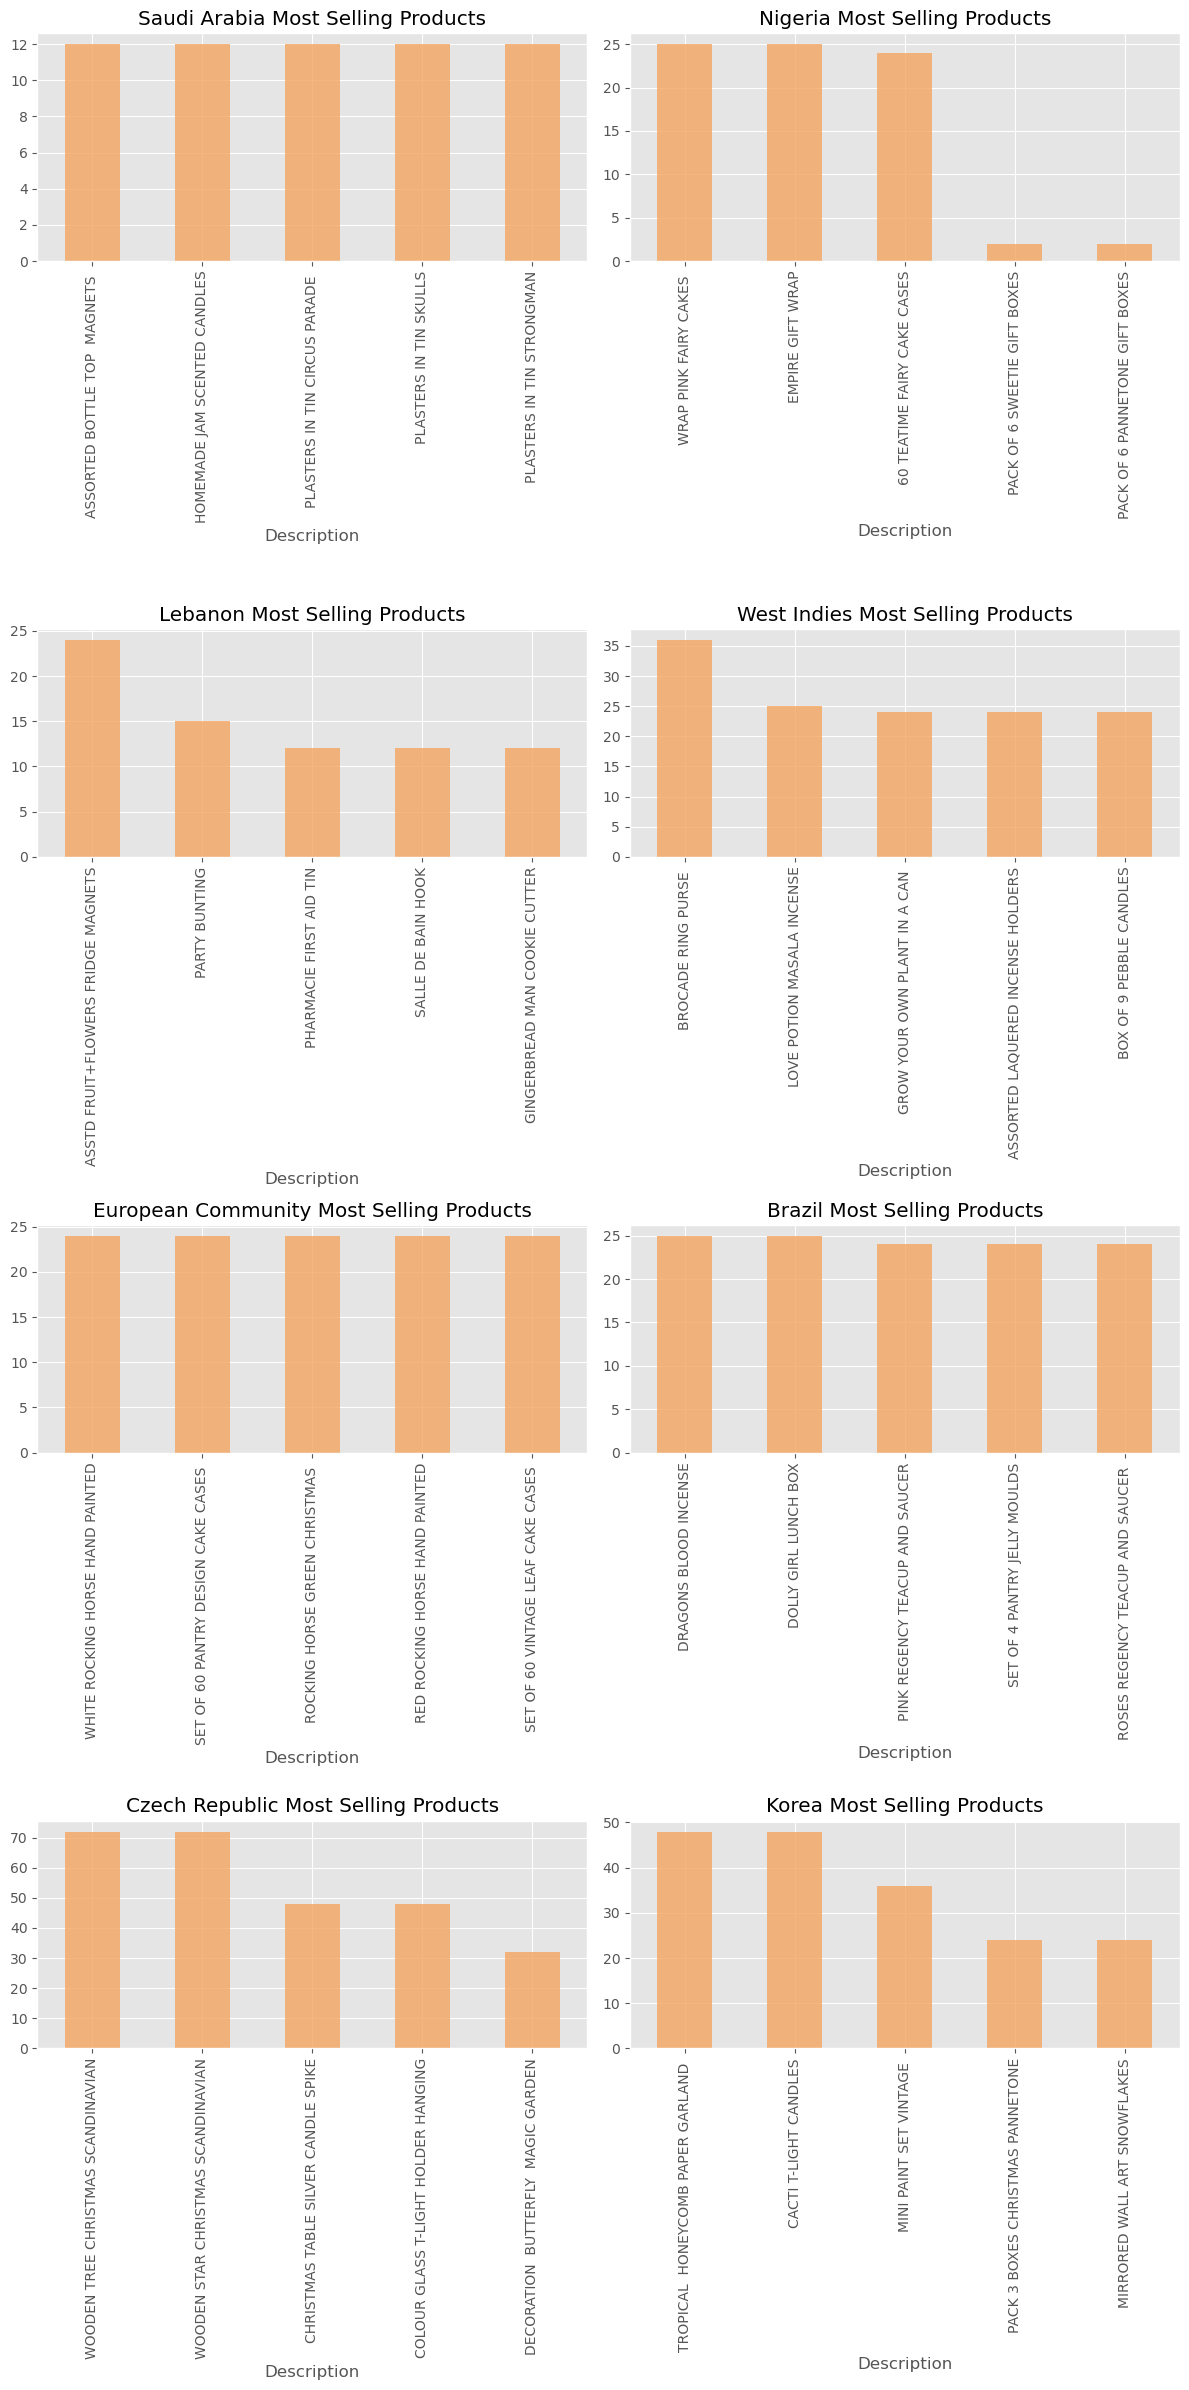

In [51]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)

    plt.tight_layout()

# EDA INSIGHTS:

1.Our Top 5 Best Selling Products are World War 2 Gliders, White Hanging Heart, Assorted Colour Bird, Jumbo Bag Red, Brocade Ring.

2.Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3.2010 is the year in which we have the most transactions followed by the 2011

4.Q4 being the highest when it comes transactions.

5.It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6.People loves to shop on Thursday followed by Tuesday and Wednesday.

# RFM Estimation - (Recency, Frequency, Monetary)

In [52]:

data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [53]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [54]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [55]:
!pip install lifetimes

In [56]:

import lifetimes

In [57]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")


In [58]:
rfm_summary.head()

frequency  recency      T  monetary_value
Customer ID                                           
12346.0           10.0    400.0  725.0      -15.468000
12347.0            7.0    402.0  404.0      717.398571
12348.0            4.0    363.0  438.0      449.310000
12349.0            4.0    717.0  735.0     1107.172500
12350.0            0.0      0.0  310.0        0.000000

In [59]:
rfm_summary.reset_index(inplace = True)

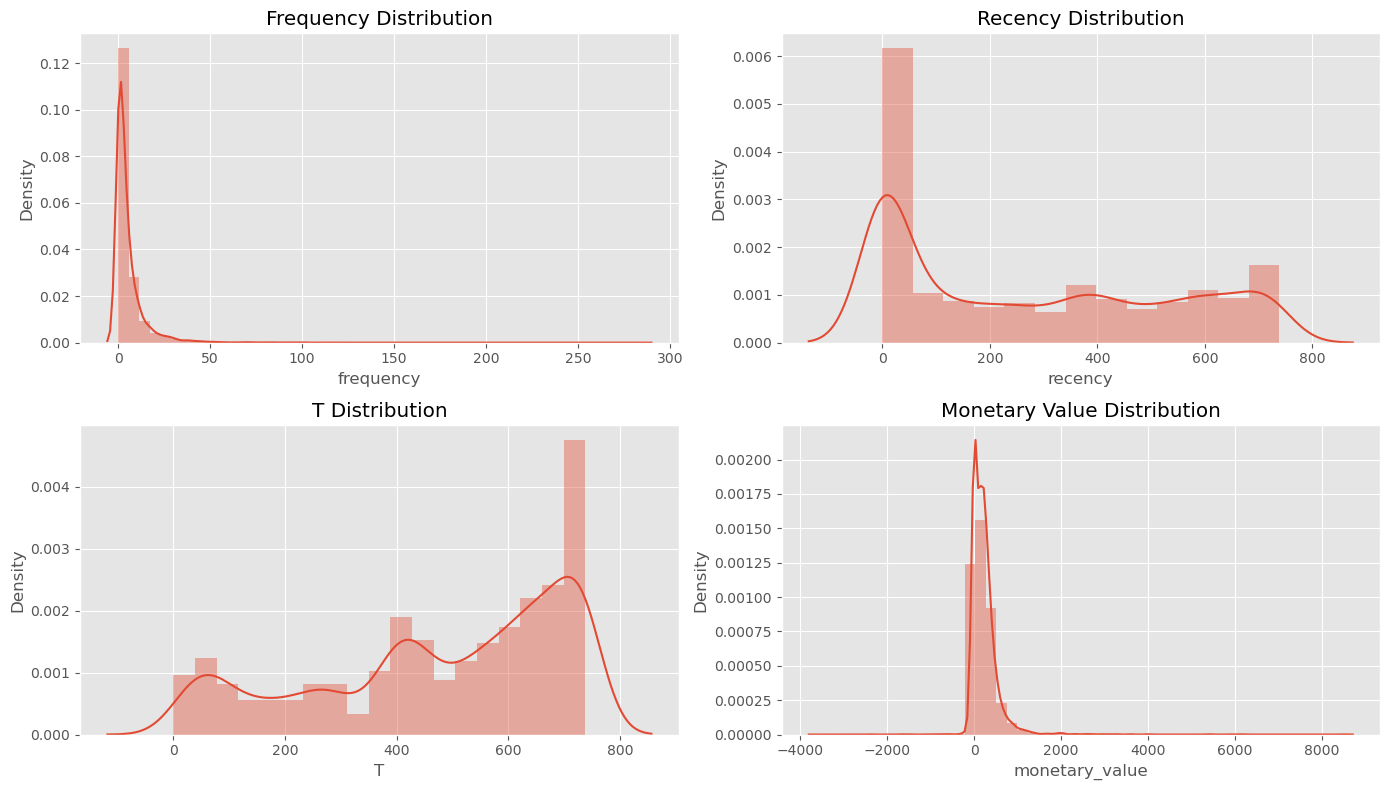

In [60]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

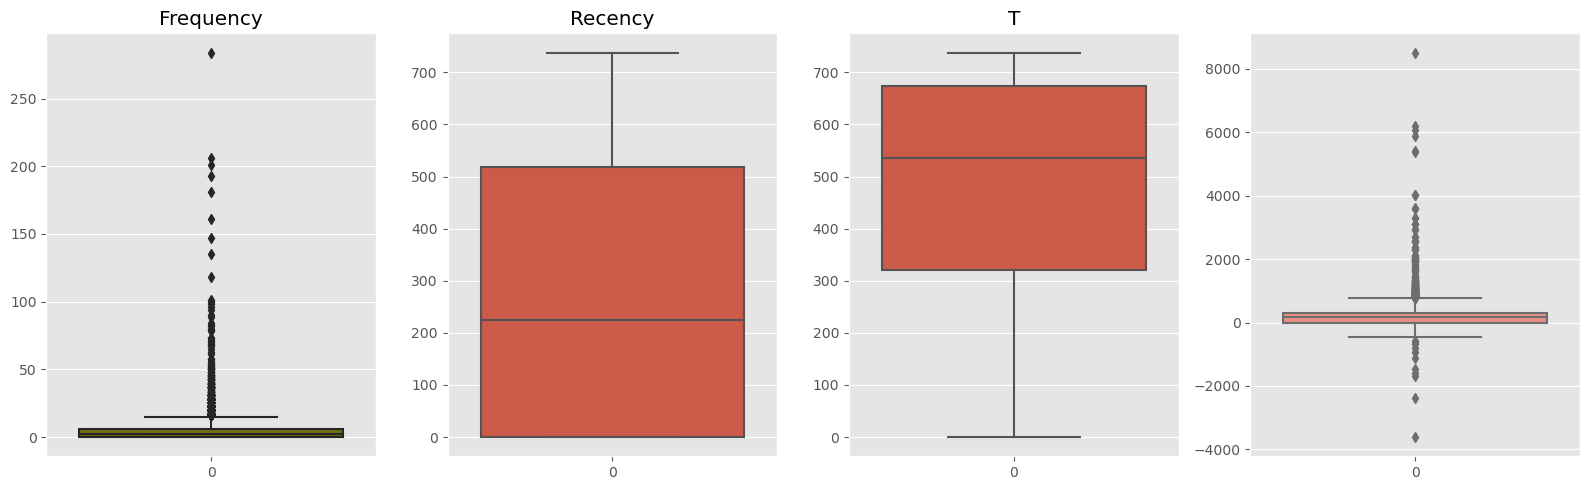

In [61]:

plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [62]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
1%     12405.410000     0.000000     0.000000    15.000000      -40.623900
10%    12940.100000     0.000000     0.000000    89.000000        0.000000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
90%    17692.900000    13.000000   672.900000   731.000000      502.095625
99%    18227.590000    44.590000   734.000000   738.000000     1328.480453
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

As we can see how are frequency changing from 90 percentile to 99 percentile but same not the case with the recency as there is no much jump in the numbers so we can clearly see from there as well as there are some extreme values contains both in the frequency and monetary value.

# PARETO/NBD MODEL

In [63]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [64]:
def get_model(data, penalizer_val, time):

    pareto_result = data.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    #calculating the predicted_purchases

    t = time

    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


    pareto_result["Actual_Purchases"] = pareto_result["frequency"]/pareto_result["recency"]*time

    #filling the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace = True)


    #calculating the error
    pareto_result["Prediction_Error"] = np.abs(pareto_result["Actual_Purchases"] - pareto_result["predicted_purchases"])

    #calcuating the purchase prediction error
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()

    #printing the purchase prediction error
    print("Predicted Purchase Mean Squared Error: %s" %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s" %(pareto_r2_purchase))
    print("Predicted Purchase Root Mean Squared Error: %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchases Error: %s" %(pareto_avg_error_purchase))


    #plotting the prediction v/s actual purchase plot
    plt.figure(figsize=(6,4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], fmt='o', color='darkseagreen',
                 ecolor='grey', elinewidth=1.5, capsize=0, alpha = 0.2);
    plt.title("Prediction v/s Actual")

Predicted Purchase Mean Squared Error: 4.335934568785449
Predicted Purchase R2 Score: 0.004258462996240553
Predicted Purchase Root Mean Squared Error: 2.0822907022760893
Predicted Purchase Average Purchases Error: 0.45678448827780677


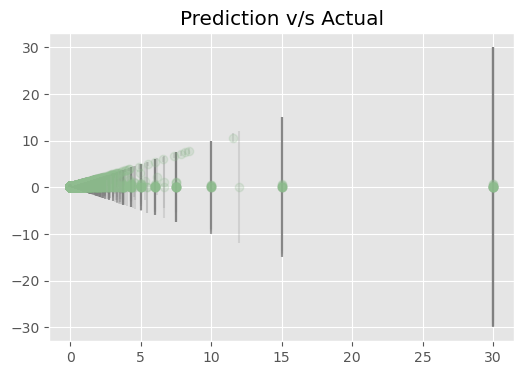

In [65]:
get_model(rfm_summary, 0.001, 30)


Based on the above errors, we have found that penalizer_coef = 0.1 is doing slightly better at minimizing the errors so we will be using 0.1 for our model.

In [66]:
def create_pareto_model(penalizer_coef=0.1):
    pareto_model = ParetoNBDFitter(penalizer_coef=penalizer_coef)
    return pareto_model
pareto_model = create_pareto_model(penalizer_coef=0.1)


In [67]:
def fit_pareto_model(pareto_model, X_frequency, X_recency, X_T):
    pareto_model.fit(X_frequency, X_recency, X_T)
fit_pareto_model(pareto_model, rfm_summary["frequency"], rfm_summary["recency"], rfm_summary["T"])


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

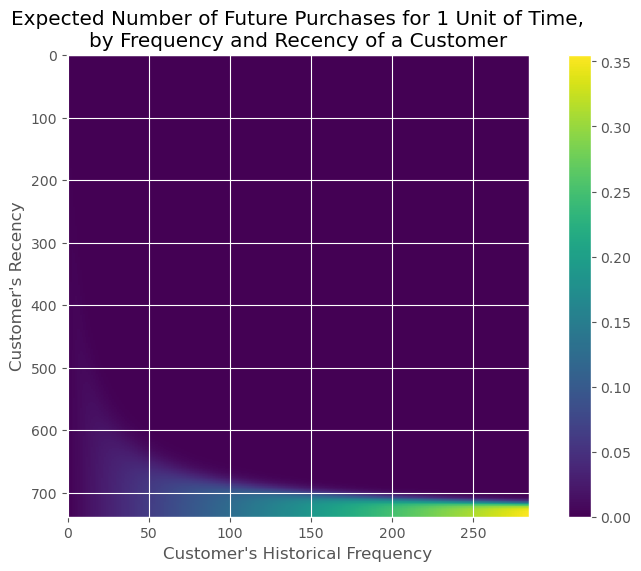

In [68]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

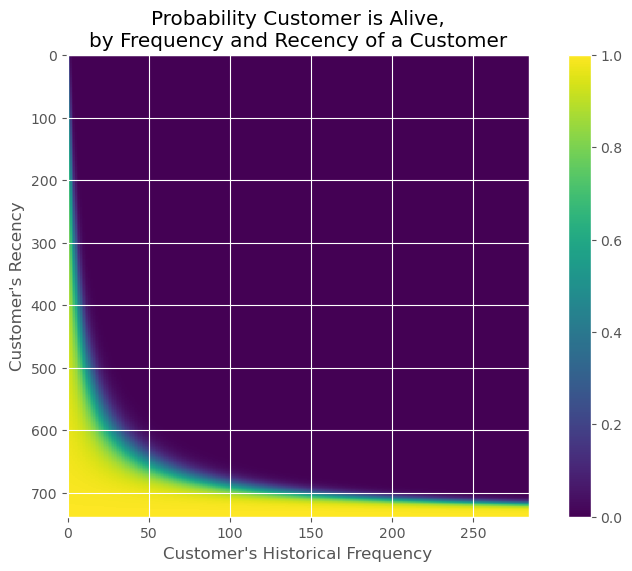

In [69]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)


In [70]:
pareto_result = rfm_summary.copy()

In [71]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


In [72]:
pareto_result.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4      12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  
0  0.180109  
1  0.999366  
2  0.965105  
3  0.996326  
4  0.665256

In [73]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


In [74]:
pareto_result

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0         12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1         12347.0        7.0    402.0  404.0      717.398571     0.000634   
2         12348.0        4.0    363.0  438.0      449.310000     0.034895   
3         12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4         12350.0        0.0      0.0  310.0        0.000000     0.334744   
...           ...        ...      ...    ...             ...          ...   
5937      18283.0       18.0    655.0  658.0      146.405556     0.000657   
5938      18284.0        1.0      2.0  431.0      -25.000000     0.730097   
5939      18285.0        0.0      0.0  660.0        0.000000     0.523576   
5940      18286.0        2.0    247.0  723.0      362.740000     0.417540   
5941      18287.0        6.0    696.0  738.0      697.165000     0.009871   

       p_alive  predicted_purchases  
0     0.180109             0.073997  
1     0.999366             0.499741  
2     0.965105             0.277710  
3     0.996326             0.180374  
4     0.665256             0.044305  
...        ...                  ...  
5937  0.999343             0.779793  
5938  0.269903             0.029887  
5939  0.476424             0.016428  
5940  0.582460             0.062766  
5941  0.990129             0.252460  

[5942 rows x 8 columns]

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

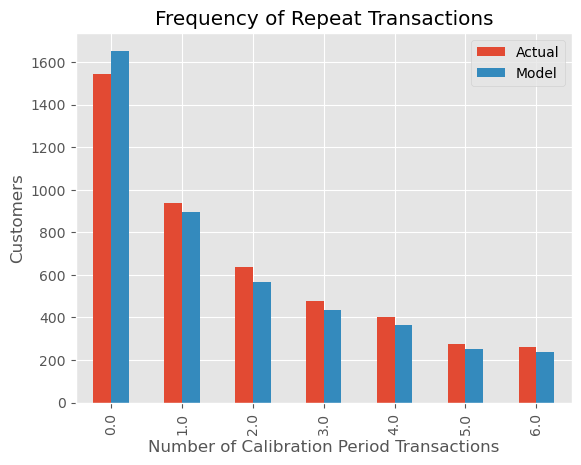

In [75]:
plot_period_transactions(pareto_model)


In [76]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate",
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [77]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [78]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.81, beta: 801.34, r: 0.83, s: 0.76>

In [79]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

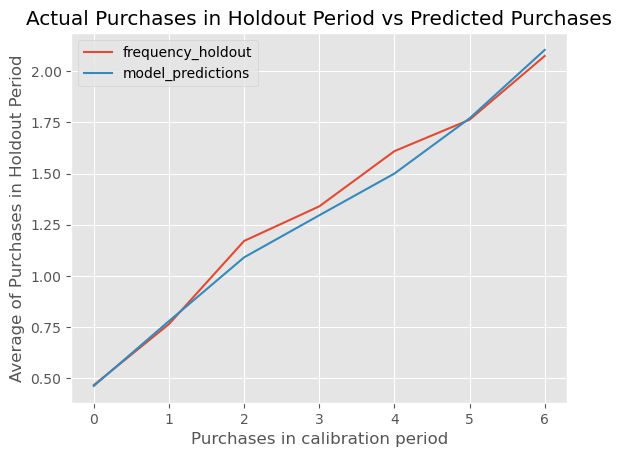

In [80]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)


In [81]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [82]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30


In [83]:
pareto_result["actual30"].fillna(0, inplace = True)

In [84]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]


In [85]:
pareto_result.head()


Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4      12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  predicted_purchases  actual30     error  
0  0.180109             0.073997  0.750000  0.676003  
1  0.999366             0.499741  0.522388  0.022647  
2  0.965105             0.277710  0.330579  0.052869  
3  0.996326             0.180374  0.167364 -0.013010  
4  0.665256             0.044305  0.000000 -0.044305

In [86]:
def get_metrics(true, predicted, error):
    print("Mean Squared Error: %s" % (mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s" % (sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s" % (r2_score(true, predicted)))

    sns.scatterplot(x=true, y=predicted, size=error, color="darkolivegreen")  # Pass x and y as parameters, size as a keyword argument
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squared Error: 4.335930944167503
Root Mean Squared Error: 2.0822898319320253
R2 Score: 0.0042592953848726856


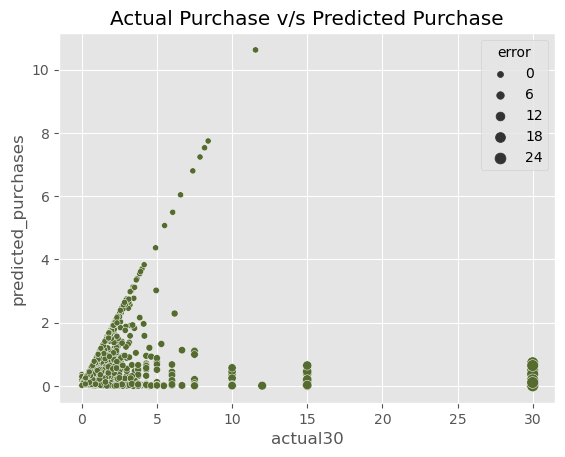

In [87]:
get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])


In [88]:
from lifetimes.plotting import plot_history_alive

In [89]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):

    individual_alive = data[data["Customer ID"] == id_]
    plot_history_alive(pareto_model, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

# GAMMA-GAMMA MODEL

Before proceding with our Gamma Gamma Model, we have to first filter the data where we are going to remove the values with 0 frequency and monetary values.

In [90]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]


In [91]:
idx = idx.index


In [92]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [93]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index


In [94]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)


In [95]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)


<Axes: >

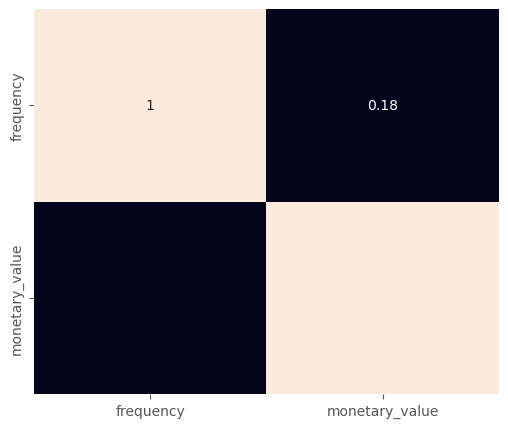

In [96]:
plt.figure(figsize=(6,5))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [97]:
ggf_model =  lifetimes.GammaGammaFitter(penalizer_coef=0.1)


In [98]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])


<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.02, q: 0.19, v: 0.95>

In [99]:
ggf_model.summary


coef  se(coef)  lower 95% bound  upper 95% bound
p  1.023190  0.024652         0.974873         1.071508
q  0.185956  0.003114         0.179852         0.192060
v  0.947145  0.025498         0.897169         0.997122

In [100]:
ggf_filter["expected_avg_sales_"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"], ggf_filter["monetary_value"])


In [101]:
ggf_filter.head()


Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6      12352.0        8.0    356.0  392.0      218.182500     0.017281   
7      12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales_  
1  0.999366             0.499741  0.522388  0.022647           809.543574  
2  0.965105             0.277710  0.330579  0.052869           561.160804  
3  0.996326             0.180374  0.167364 -0.013010          1382.358199  
6  0.982719             0.568668  0.674157  0.105490           242.408202  
7  0.873065             0.101370  0.147059  0.045689           440.041239

In [102]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))

Mean Squared Error: 793392.884868792
Root Mean Squared Error: 890.7260436681933
R2 Score: -4.485799230635626


In [103]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model,
                                                       ggf_filter["frequency"],
                                                       ggf_filter["recency"],
                                                       ggf_filter["T"],
                                                       ggf_filter["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)


In [104]:
#Top 5 customers with high CLV
ggf_filter[["Customer ID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)

Customer ID  predicted_clv
5756      18102.0  494032.814713
2300      14646.0  426704.412842
5104      17450.0  252496.065476
1810      14156.0  239242.456161
1750      14096.0  225594.539175

In [105]:
# Assuming 5% of Profit Margin
ggf_filter["profit_margin"] = ggf_filter["predicted_clv"]*0.05

In [106]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)


In [107]:
#exporting the result to csv
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

# CUSTOMER SEGMENTATION USING PREDICTED CLV

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns.

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [108]:
ggf_filter.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034895   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6      12352.0        8.0    356.0  392.0      218.182500     0.017281   
7      12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales_  \
1  0.999366             0.499741  0.522388  0.022647           809.543574   
2  0.965105             0.277710  0.330579  0.052869           561.160804   
3  0.996326             0.180374  0.167364 -0.013010          1382.358199   
6  0.982719             0.568668  0.674157  0.105490           242.408202   
7  0.873065             0.101370  0.147059  0.045689           440.041239   

   predicted_clv  profit_margin  
1    8446.886294     422.344315  
2    3153.812357     157.690618  
3    5372.047778     268.602389  
6    2827.890024     141.394501  
7     844.422261      42.221113

In [109]:
ggf_filter.shape

(4185, 13)

In [110]:
col = ["predicted_purchases", "expected_avg_sales_", "predicted_clv", "profit_margin"]


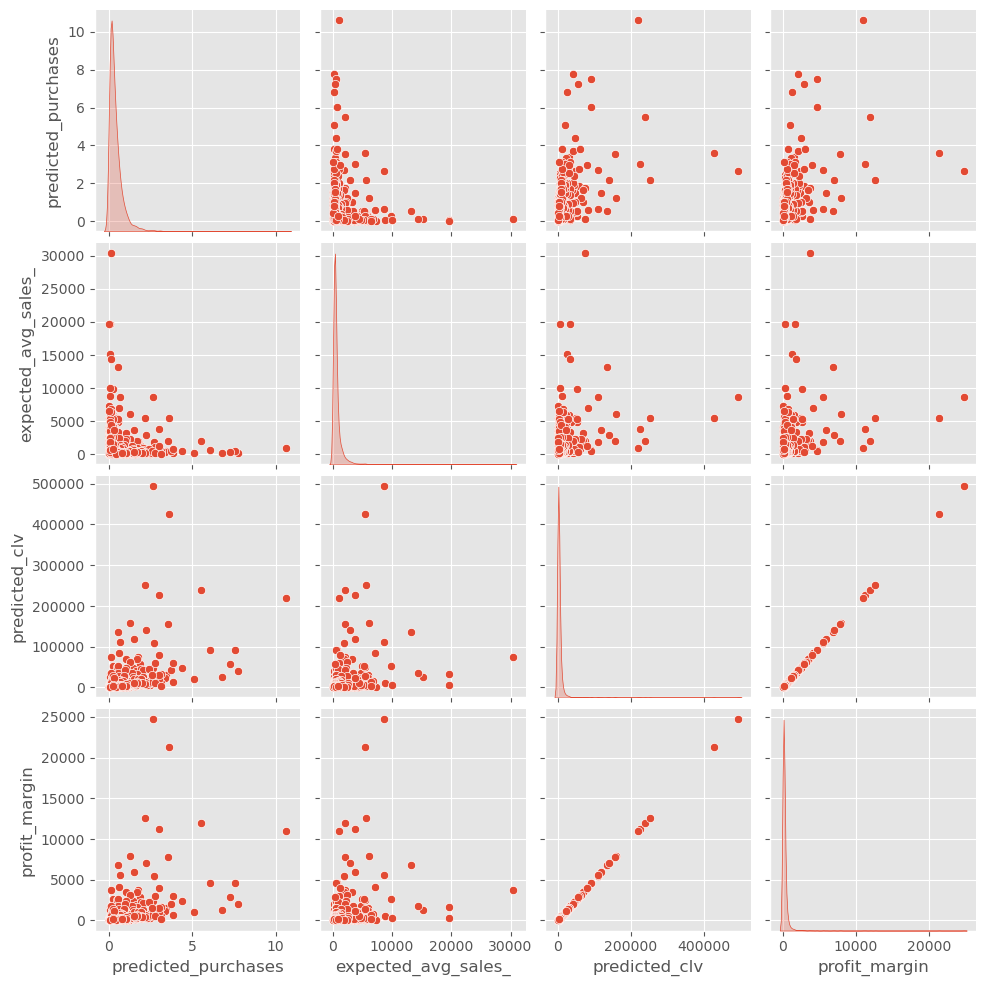

In [111]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [112]:
new_df = ggf_filter[col]

In [113]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)


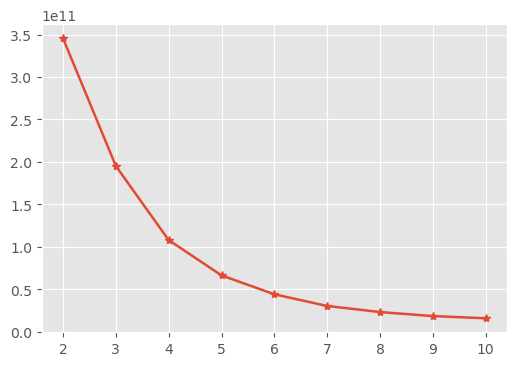

In [114]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [115]:
k_model = KMeans(n_clusters = 4, init = "k-means++",  max_iter = 1000,random_state=3)


In [116]:

k_model_fit = k_model.fit(new_df)

In [117]:

new_df


predicted_purchases  expected_avg_sales_  predicted_clv  profit_margin
1                0.499741           809.543574    8446.886294     422.344315
2                0.277710           561.160804    3153.812357     157.690618
3                0.180374          1382.358199    5372.047778     268.602389
6                0.568668           242.408202    2827.890024     141.394501
7                0.101370           440.041239     844.422261      42.221113
...                   ...                  ...            ...            ...
5935             0.080077           400.022878     630.826356      31.541318
5936             0.441465            64.211847     564.739568      28.236978
5937             0.779793           153.230929    2570.827752     128.541388
5940             0.062766           603.141334     555.630595      27.781530
5941             0.252460           803.922101    4333.592638     216.679632

[4185 rows x 4 columns]

In [118]:
centers = k_model_fit.cluster_centers_


In [119]:
centers

array([[3.59694329e-01, 5.60318094e+02, 2.98037478e+03, 1.49018739e+02],
       [3.12948129e+00, 7.02410745e+03, 4.60368614e+05, 2.30184307e+04],
       [3.06298105e+00, 4.60844095e+03, 1.69706586e+05, 8.48532931e+03],
       [1.63371935e+00, 2.49111257e+03, 3.38576964e+04, 1.69288482e+03]])

In [120]:

labels = k_model_fit.labels_

In [121]:
labels = pd.Series(labels, name = "Labels")

In [122]:
ggf_filter.shape

(4185, 13)

In [123]:
print(ggf_filter)

      Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1         12347.0        7.0    402.0  404.0      717.398571     0.000634   
2         12348.0        4.0    363.0  438.0      449.310000     0.034895   
3         12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6         12352.0        8.0    356.0  392.0      218.182500     0.017281   
7         12353.0        1.0    204.0  408.0       89.000000     0.126935   
...           ...        ...      ...    ...             ...          ...   
5935      18281.0        1.0    397.0  577.0       80.820000     0.064327   
5936      18282.0        2.0    119.0  126.0       38.195000     0.004912   
5937      18283.0       18.0    655.0  658.0      146.405556     0.000657   
5940      18286.0        2.0    247.0  723.0      362.740000     0.417540   
5941      18287.0        6.0    696.0  738.0      697.165000     0.009871   

       p_alive  predicted_purchases  actual30     error  expected_avg_sales

In [124]:
if ggf_filter.isna().values.any():
    print("DataFrame contains NA values")
else:
    print("DataFrame does not contain NA values")

DataFrame does not contain NA values


In [125]:
ggf_filter.reset_index(inplace=True)

ggf_filter


index  Customer ID  frequency  recency      T  monetary_value  \
0         1      12347.0        7.0    402.0  404.0      717.398571   
1         2      12348.0        4.0    363.0  438.0      449.310000   
2         3      12349.0        4.0    717.0  735.0     1107.172500   
3         6      12352.0        8.0    356.0  392.0      218.182500   
4         7      12353.0        1.0    204.0  408.0       89.000000   
...     ...          ...        ...      ...    ...             ...   
4180   5935      18281.0        1.0    397.0  577.0       80.820000   
4181   5936      18282.0        2.0    119.0  126.0       38.195000   
4182   5937      18283.0       18.0    655.0  658.0      146.405556   
4183   5940      18286.0        2.0    247.0  723.0      362.740000   
4184   5941      18287.0        6.0    696.0  738.0      697.165000   

      p_not_alive   p_alive  predicted_purchases  actual30     error  \
0        0.000634  0.999366             0.499741  0.522388  0.022647   
1        0.034895  0.965105             0.277710  0.330579  0.052869   
2        0.003674  0.996326             0.180374  0.167364 -0.013010   
3        0.017281  0.982719             0.568668  0.674157  0.105490   
4        0.126935  0.873065             0.101370  0.147059  0.045689   
...           ...       ...                  ...       ...       ...   
4180     0.064327  0.935673             0.080077  0.075567 -0.004510   
4181     0.004912  0.995088             0.441465  0.504202  0.062736   
4182     0.000657  0.999343             0.779793  0.824427  0.044634   
4183     0.417540  0.582460             0.062766  0.242915  0.180149   
4184     0.009871  0.990129             0.252460  0.258621  0.006161   

      expected_avg_sales_  predicted_clv  profit_margin  
0              809.543574    8446.886294     422.344315  
1              561.160804    3153.812357     157.690618  
2             1382.358199    5372.047778     268.602389  
3              242.408202    2827.890024     141.394501  
4              440.041239     844.422261      42.221113  
...                   ...            ...            ...  
4180           400.022878     630.826356      31.541318  
4181            64.211847     564.739568      28.236978  
4182           153.230929    2570.827752     128.541388  
4183           603.141334     555.630595      27.781530  
4184           803.922101    4333.592638     216.679632  

[4185 rows x 14 columns]

In [126]:
ggf_filter.shape

(4185, 14)

In [127]:
ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

In [128]:
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
4180    0
4181    0
4182    0
4183    0
4184    0
Name: Labels, Length: 4185, dtype: int32


In [129]:
print(ggf_filter)

      index  Customer ID  frequency  recency      T  monetary_value  \
0         1      12347.0        7.0    402.0  404.0      717.398571   
1         2      12348.0        4.0    363.0  438.0      449.310000   
2         3      12349.0        4.0    717.0  735.0     1107.172500   
3         6      12352.0        8.0    356.0  392.0      218.182500   
4         7      12353.0        1.0    204.0  408.0       89.000000   
...     ...          ...        ...      ...    ...             ...   
4180   5935      18281.0        1.0    397.0  577.0       80.820000   
4181   5936      18282.0        2.0    119.0  126.0       38.195000   
4182   5937      18283.0       18.0    655.0  658.0      146.405556   
4183   5940      18286.0        2.0    247.0  723.0      362.740000   
4184   5941      18287.0        6.0    696.0  738.0      697.165000   

      p_not_alive   p_alive  predicted_purchases  actual30     error  \
0        0.000634  0.999366             0.499741  0.522388  0.022647   
1  

In [130]:
print(len(labels))

4185


In [131]:
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
4180    0
4181    0
4182    0
4183    0
4184    0
Name: Labels, Length: 4185, dtype: int32


In [132]:
print(len(ggf_filter))

4185


In [133]:
if ggf_filter.isna().values.any():
    print("DataFrame contains NA values")
else:
    print("DataFrame does not contain NA values")

DataFrame does not contain NA values


In [134]:
ggf_filter.shape

(4185, 15)

In [135]:
average_profit_margin = ggf_filter.groupby('Labels')['profit_margin'].mean()
print(average_profit_margin)

Labels
0      149.018739
1    23018.430689
2     8485.329311
3     1692.884822
Name: profit_margin, dtype: float64


In [136]:
print(ggf_filter['Labels'].unique())

[0 3 2 1]


In [137]:
print("Original DataFrame:")
print(ggf_filter)
print("Index length:", len(ggf_filter.index))
print("Shape:", ggf_filter.shape)



Original DataFrame:
      index  Customer ID  frequency  recency      T  monetary_value  \
0         1      12347.0        7.0    402.0  404.0      717.398571   
1         2      12348.0        4.0    363.0  438.0      449.310000   
2         3      12349.0        4.0    717.0  735.0     1107.172500   
3         6      12352.0        8.0    356.0  392.0      218.182500   
4         7      12353.0        1.0    204.0  408.0       89.000000   
...     ...          ...        ...      ...    ...             ...   
4180   5935      18281.0        1.0    397.0  577.0       80.820000   
4181   5936      18282.0        2.0    119.0  126.0       38.195000   
4182   5937      18283.0       18.0    655.0  658.0      146.405556   
4183   5940      18286.0        2.0    247.0  723.0      362.740000   
4184   5941      18287.0        6.0    696.0  738.0      697.165000   

      p_not_alive   p_alive  predicted_purchases  actual30     error  \
0        0.000634  0.999366             0.499741  0.522

In [138]:
label_mapper = dict({0 : "Low", 3: "Medium", 2: "High", 1: "V_High"})


In [139]:
ggf_filter['cluster_category'] = ggf_filter['Labels'].apply(lambda label: label_mapper.get(label))

print(ggf_filter)



      index  Customer ID  frequency  recency      T  monetary_value  \
0         1      12347.0        7.0    402.0  404.0      717.398571   
1         2      12348.0        4.0    363.0  438.0      449.310000   
2         3      12349.0        4.0    717.0  735.0     1107.172500   
3         6      12352.0        8.0    356.0  392.0      218.182500   
4         7      12353.0        1.0    204.0  408.0       89.000000   
...     ...          ...        ...      ...    ...             ...   
4180   5935      18281.0        1.0    397.0  577.0       80.820000   
4181   5936      18282.0        2.0    119.0  126.0       38.195000   
4182   5937      18283.0       18.0    655.0  658.0      146.405556   
4183   5940      18286.0        2.0    247.0  723.0      362.740000   
4184   5941      18287.0        6.0    696.0  738.0      697.165000   

      p_not_alive   p_alive  predicted_purchases  actual30     error  \
0        0.000634  0.999366             0.499741  0.522388  0.022647   
1  

In [140]:
ggf_filter.groupby("cluster_category").mean().T

cluster_category              High           Low        Medium         V_High
index                  2925.363636   2966.656012   2470.647619    4028.000000
Customer ID           15271.363636  15312.656012  14816.647619   16374.000000
frequency                70.181818      6.739857     37.323810      83.000000
recency                 496.181818    386.451438    470.638095     737.000000
T                       503.636364    526.247357    487.390476     737.500000
monetary_value         2965.939413    301.535904   1056.557527    6952.630519
p_not_alive               0.005292      0.159638      0.011795       0.000102
p_alive                   0.994708      0.840362      0.988205       0.999898
predicted_purchases       3.062981      0.359694      1.633719       3.129481
actual30                  6.203157      0.714066      2.054750       3.379286
error                     3.140175      0.354372      0.421031       0.249805
expected_avg_sales_    4608.440954    560.318094   2491.112565    7024.107445
predicted_clv        169706.586227   2980.374780  33857.696438  460368.613778
profit_margin          8485.329311    149.018739   1692.884822   23018.430689
Labels                    2.000000      0.000000      3.000000       1.000000

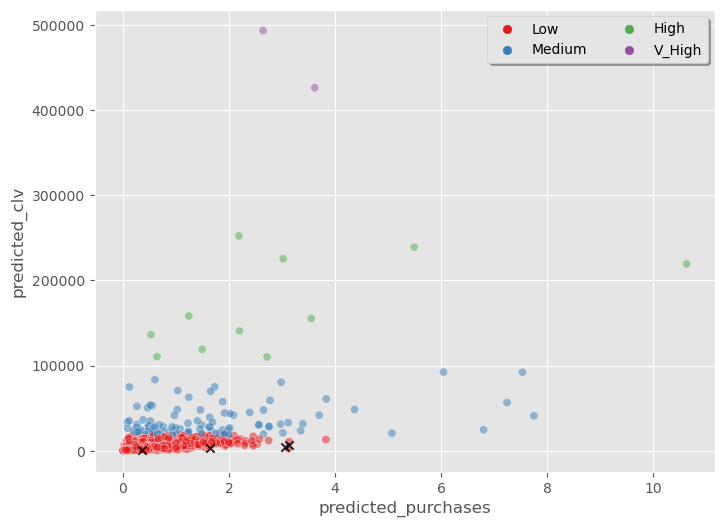

In [141]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "cluster_category", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper right',  shadow=True, ncol=2)

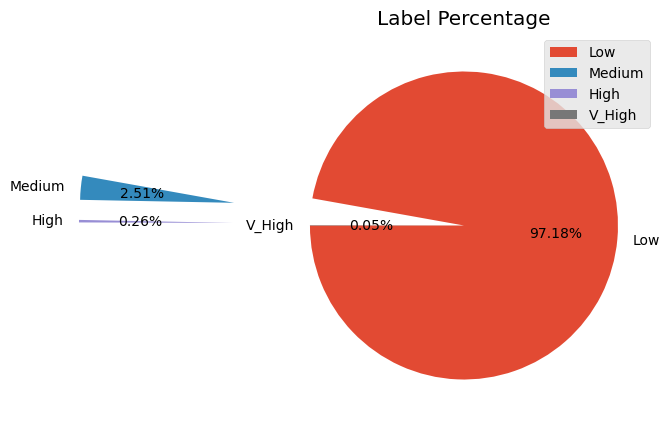

In [142]:
plt.figure(figsize=(5,5))
plt.pie(ggf_filter["Labels"].value_counts(), labels = ggf_filter["cluster_category"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
plt.title("Label Percentage")
plt.legend()

In [143]:
ggf_filter.to_csv("customer_segmentation_result.csv")